In [1]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import numpy as np

In [2]:
X_init = 10
Y_init = 1
tend = 50

a = 1.1  # prey growth rate 
b = 0.4  # prey death rate 
c = 0.1  # predator growth rate 
h = 0.4  # predator death rate 

X = [X_init]
Y = [Y_init]
t = [0]

delta_t = 0.5

In [3]:
while t[-1] < tend:
    next_X = X[-1] + (a*X[-1] - b*X[-1]*Y[-1])*delta_t
    X.append(next_X)
    next_Y = Y[-1] + (c*X[-1]*Y[-1] - h*Y[-1])*delta_t
    Y.append(next_Y)
    next_t = t[-1]+delta_t
    t.append(next_t)

Text(0, 0.5, 'Population')

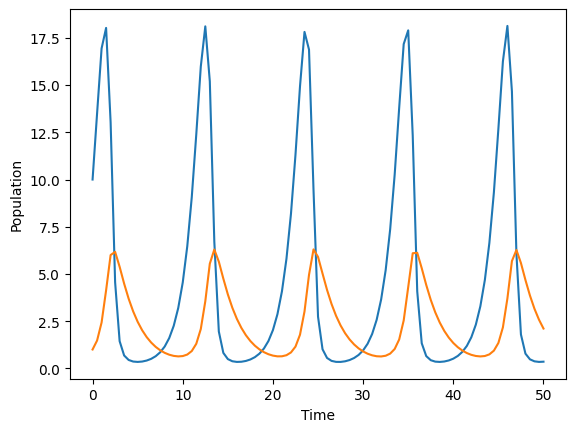

In [4]:
fig, ax = plt.subplots()
plt.plot(t,X)
plt.plot(t,Y)
ax.set_xlabel('Time')
ax.set_ylabel('Population')


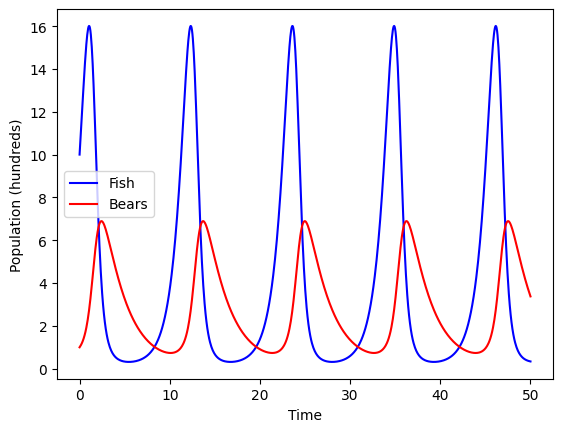

In [5]:

y0 = [10,1] # [fish, bears] units in hundreds

t = np.linspace(0,50,num=1000)

alpha = 1.1
beta = 0.4
delta = 0.1
gamma = 0.4

# steady state initial conditions
# y0 = [gamma/delta , alpha/beta] # [fish, bears] units in hundreds


params = [alpha, beta, delta, gamma]

def sim(variables, t, params):

    # fish population level
    x = variables[0]

    # bear population level
    y = variables[1]


    alpha = params[0]
    beta = params[1]
    delta = params[2]
    gamma = params[3]

    dxdt = alpha * x - beta * x * y
    dydt = delta * x * y - gamma * y

    return([dxdt, dydt])

# solve with scipy
y = odeint(sim, y0, t, args=(params,))


f,ax = plt.subplots()
line1, = ax.plot(t,y[:,0], color="b", label='Fish')
line2, = ax.plot(t,y[:,1], color="r", label='Bears')

ax.set_ylabel("Population (hundreds)")
#ax.set_ylabel("Fish (hundreds)")
#ax.set_ylabel("Bears (hundreds)")
ax.set_xlabel("Time")
plt.legend()

